## Case Study on Probability for Data Science
### Problem Statement: 
#### To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)Also, if some data pre-processing is necessary do that as well.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [2]:
data = pd.read_csv(r'D:\Devi\ICT_TVM\CASE STUDY\mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### EDA

In [4]:
data.shape

(8124, 23)

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data['class'].unique()

array(['p', 'e'], dtype=object)

There are two classifications, either the mashroom is edible or poisionus.

In [10]:
data.groupby(by ='class').describe()

cap-shape                  cap-surface                  cap-color  \
          count unique top  freq       count unique top  freq     count   
class                                                                     
e          4208      5   x  1948        4208      3   f  1560      4208   
p          3916      5   x  1708        3916      4   y  1740      3916   

              ... spore-print-color       population                  habitat  \
      unique  ...               top  freq      count unique top  freq   count   
class         ...                                                               
e         10  ...                 n  1744       4208      6   v  1192    4208   
p          8  ...                 w  1812       3916      4   v  2848    3916   

                        
      unique top  freq  
class                   
e          7   d  1880  
p          6   d  1268  

[2 rows x 88 columns]

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [11]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [12]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:>

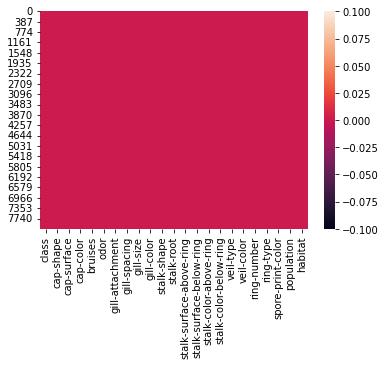

In [13]:
sns.heatmap(data.isna())

There is no null values in the dataset given

### Preprocessing

Since the given features are strings, we need to convert it into integers. For that we can use Label Encoding

In [14]:
# Encoding
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
    
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


We successfully converted our values into integer.

In [15]:
# Splitting the data into X(feature set) and Y(Target)

X = data.iloc[:,1:23]
Y = data.iloc[:,0]



In [16]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [17]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [18]:
# Scaling

from sklearn.preprocessing import StandardScaler

standardscaling = StandardScaler()
X = standardscaling.fit_transform(X)

In [19]:
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

### Training and testing

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=.20,random_state=45)

### Naive Bayes classifier

#### 1.Gaussian NB

In [21]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train,Y_train)

GaussianNB()

In [22]:
gaussian_nb.predict(X_test)

array([0, 0, 1, ..., 1, 1, 1])

In [23]:
gaussian_nb.score(X_test,Y_test)

0.9126153846153846

Accuracy is pretty good with this classifier, we can check the accuracy after normalising the data.

In [24]:
# Normalising the dataset

from sklearn.preprocessing import Normalizer

norm = Normalizer()
X = norm.fit_transform(X)

In [28]:
X

array([[ 0.24467806,  0.03329691, -0.04710771, ..., -0.15925029,
        -0.12222808,  0.48237101],
       [ 0.25214279,  0.03431274,  0.4324047 , ..., -0.06133204,
        -0.32153718, -0.0724145 ],
       [-0.52556762,  0.03528752,  0.34576615, ..., -0.0630744 ,
        -0.33067157,  0.21836859],
       ...,
       [-0.10254044,  0.0170987 , -0.02419085, ..., -0.1842098 ,
        -0.25768952,  0.0348629 ],
       [-0.05235041,  0.2299818 , -0.04782888, ...,  0.34461584,
         0.06859615,  0.06892908],
       [ 0.12457865,  0.01695323, -0.02398505, ...,  0.02047697,
        -0.25549718,  0.0345663 ]])

In [29]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train,Y_train)

GaussianNB()

In [30]:
gaussian_nb.predict(X_test)

array([0, 0, 1, ..., 1, 1, 1])

In [31]:
gaussian_nb.score(X_test,Y_test)

0.9126153846153846

There is no change in the score before and after normalizing the data. With  Gaussian NB we got pretty good accuracy score of 91%

### Regression Model

#### 1.Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train,Y_train)

LogisticRegression()

In [33]:
y_pred = logistic_model.predict(X_test)

In [34]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.9587692307692308
precision score: 0.9586415647832662
recall_score: 0.9586972829817346
f1 score: 0.9586690582619176


with logistic regression, we got an accuracy of 95.87%, which is good enough to predict the values

In [38]:
confusion_matrix(Y_test,y_pred)

array([[819,  34],
       [ 33, 739]], dtype=int64)

Text(24.0, 0.5, 'Y_Test')

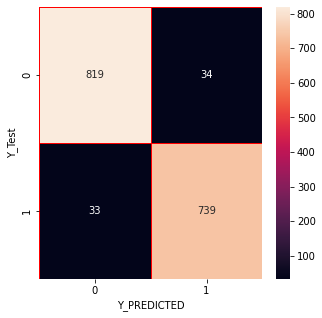

In [40]:
# plotting the confusion matrix

cm = confusion_matrix(Y_test,y_pred)
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linecolor='red',linewidths=.5,fmt = ".0f",ax=ax)
plt.xlabel("Y_PREDICTED")
plt.ylabel("Y_Test")

Comparing with the test data, we got very less false positive and false negative 

#### 2. KNN Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,Y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

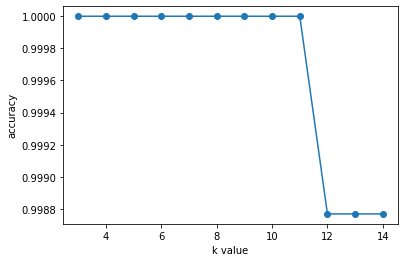

In [42]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [44]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)

In [47]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [45]:
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


With KNN model accuracy is increased and it shows 100% accuracy.

Text(24.0, 0.5, 'Y_Test')

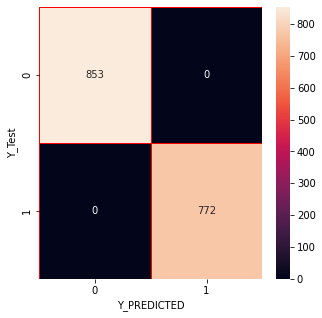

In [46]:
cm = confusion_matrix(Y_test,y_pred)
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linecolor='red',linewidths=.5,fmt = ".0f",ax=ax)
plt.xlabel("Y_PREDICTED")
plt.ylabel("Y_Test")

#### 3.Decision Tree classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
y_pred=dt_model.predict(X_test)

In [50]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [51]:
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


Decision tree algorithm also shows 100% accuracy 

Text(24.0, 0.5, 'Y_Test')

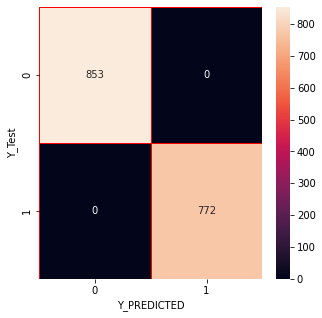

In [52]:
cm = confusion_matrix(Y_test,y_pred)
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linecolor='red',linewidths=.5,fmt = ".0f",ax=ax)
plt.xlabel("Y_PREDICTED")
plt.ylabel("Y_Test")

#### 4.SVM 

In [55]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,Y_train)
y_pred=svm_linear.predict(X_test)

In [57]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [56]:
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.9846153846153847
precision score: 0.9843102261389586
recall_score: 0.9850383286055312
f1 score: 0.9845899640742277


SVM model shows 98% accuracy 

Text(24.0, 0.5, 'Y_Test')

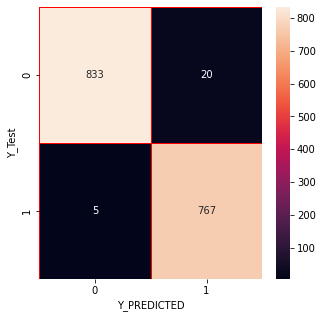

In [58]:
cm = confusion_matrix(Y_test,y_pred)
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linecolor='red',linewidths=.5,fmt = ".0f",ax=ax)
plt.xlabel("Y_PREDICTED")
plt.ylabel("Y_Test")

### Conclusion

With confusion matrix we saw that our train and test datas balanced, so there is no problem in there.
Most of classfication methods hit 100% accuracy with this dataset.